In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Indian_Kids_Screen_Time.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   str    
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   str    
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   str    
 7   Urban_or_Rural                     9712 non-null   str    
dtypes: bool(1), float64(2), int64(1), str(4)
memory usage: 540.7 KB


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Health Impact on kids

In [5]:
df["health_impacts"].drop_duplicates()

0                             Poor Sleep, Eye Strain
1                                         Poor Sleep
3                                                NaN
4                                Poor Sleep, Anxiety
9                           Poor Sleep, Obesity Risk
13                                        Eye Strain
17                                      Obesity Risk
18                                           Anxiety
24                 Poor Sleep, Anxiety, Obesity Risk
35                          Eye Strain, Obesity Risk
45                 Eye Strain, Anxiety, Obesity Risk
89                             Anxiety, Obesity Risk
118             Poor Sleep, Eye Strain, Obesity Risk
149                  Poor Sleep, Eye Strain, Anxiety
161    Poor Sleep, Eye Strain, Anxiety, Obesity Risk
206                              Eye Strain, Anxiety
Name: health_impacts, dtype: str

<Axes: ylabel='health_impacts'>

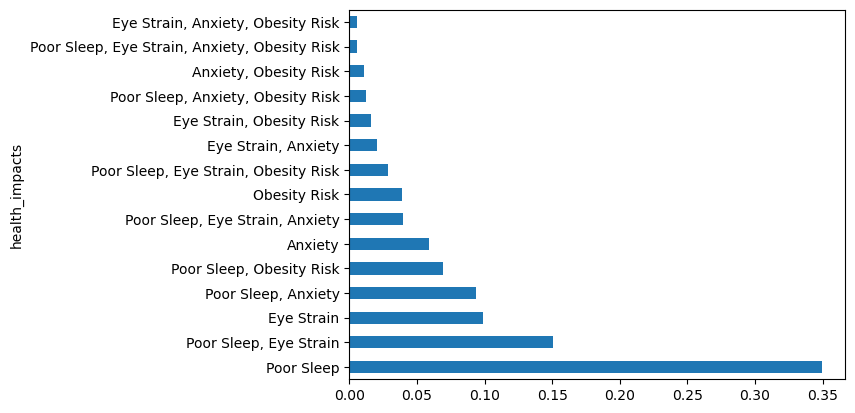

In [6]:
df["health_impacts"].value_counts(normalize=True).plot(kind="barh")

In [7]:
df["poor_sleep"] = df["health_impacts"].str.contains("Poor Sleep", case=False, na=False).astype(int)
df["eye_strain"] = df["health_impacts"].str.contains("Eye Strain", case=False, na=False).astype(int)
df["obesity_risk"] = df["health_impacts"].str.contains("Obesity", case=False, na=False).astype(int)
df["anxiety"] = df["health_impacts"].str.contains("Anxiety", case=False, na=False).astype(int)
df["total_number_of_health_impacts"] = df["poor_sleep"] + df["eye_strain"] + df["obesity_risk"] + df["anxiety"]
df["has_health_impact"] = df["health_impacts"].notna()
df["health_impact_count"] = df["has_health_impact"].astype(int)
df["no_health_impact_count"] = (~df["has_health_impact"]).astype(int)

In [8]:
df.head()

,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural,poor_sleep,eye_strain,obesity_risk,anxiety,total_number_of_health_impacts,has_health_impact,health_impact_count,no_health_impact_count
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,1,1,0,0,2,True,1,0
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,1,0,0,0,1,True,1,0
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,1,0,0,0,1,True,1,0
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,0,0,0,0,0,False,0,1
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1,0,0,1,2,True,1,0


In [9]:
health_problems_category = df[["poor_sleep", "eye_strain", "obesity_risk", "anxiety"]].sum().sort_values(ascending=False)
health_problems_category

poor_sleep      4868
eye_strain      2382
anxiety         1605
obesity_risk    1217
dtype: int64

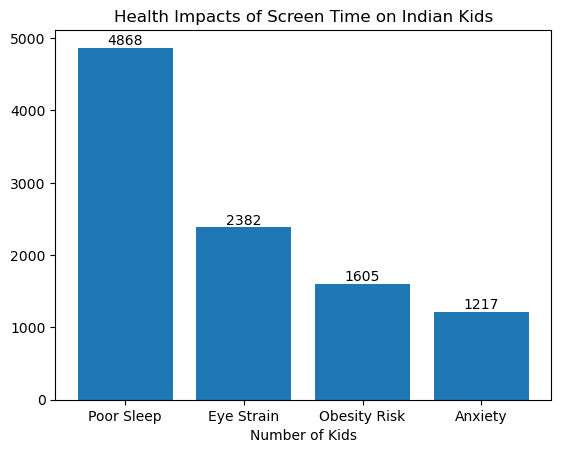

In [10]:
plt.bar(health_problems_category.index, health_problems_category.values)
plt.xlabel("Number of Kids")
plt.xticks(rotation=0, labels=["Poor Sleep", "Eye Strain", "Obesity Risk", "Anxiety"], ticks=range(4))
plt.bar_label(plt.gca().containers[0])
plt.title("Health Impacts of Screen Time on Indian Kids")
plt.show()

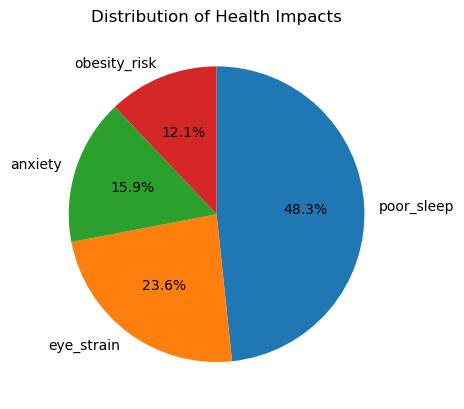

In [11]:
health_problems_category.plot(kind="pie", autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Distribution of Health Impacts")
plt.ylabel("")
plt.show()

### Screen time of kids with no health impacts

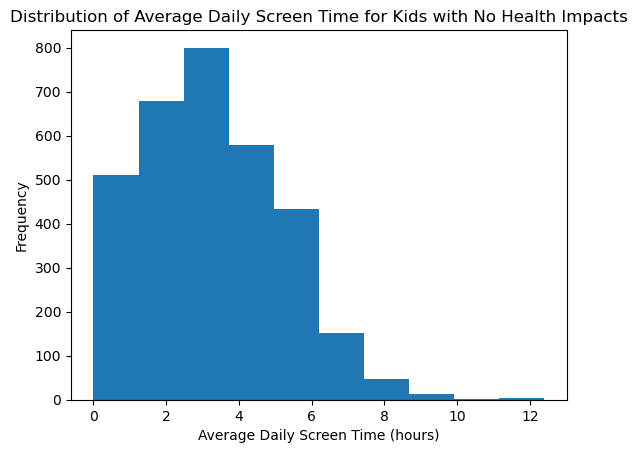

In [12]:
df[~df["has_health_impact"]]["avg_daily_screen_time_hr"].plot(kind="hist", bins=10, label="No Health Impact")
plt.xlabel("Average Daily Screen Time (hours)")
plt.title("Distribution of Average Daily Screen Time for Kids with No Health Impacts")
plt.show()

In [13]:
health_impact_count = df["has_health_impact"].value_counts().sort_index(ascending=False)
health_impact_count

has_health_impact
True     6494
False    3218
Name: count, dtype: int64

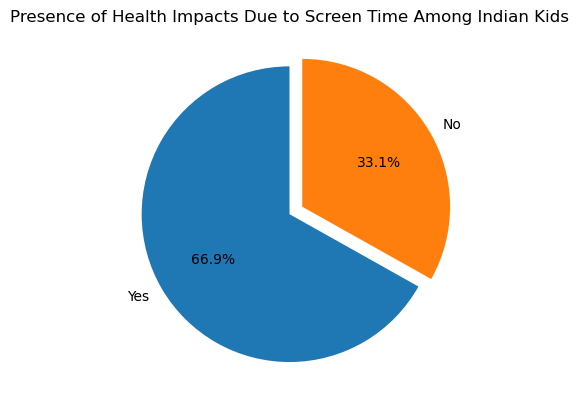

In [14]:
health_impact_count.plot(kind="pie", labels=["Yes", "No"], autopct="%1.1f%%", startangle=90, explode=[0, 0.1])
plt.title("Presence of Health Impacts Due to Screen Time Among Indian Kids")
plt.show()

In [15]:
health_impact_by_gender = df[["gender", "has_health_impact"]].value_counts().unstack(level=0)
health_impact_by_gender

gender,Male,Female
has_health_impact,,
True,3342,3152
False,1600,1618


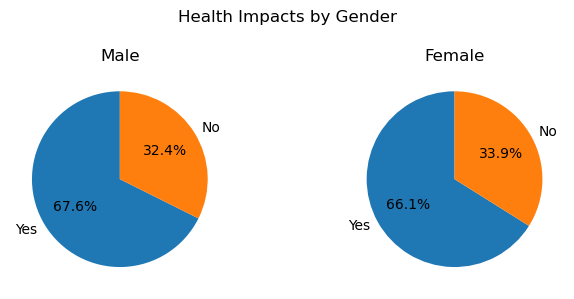

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

for i, gender in enumerate(health_impact_by_gender.columns):
    axes[i].pie(health_impact_by_gender[gender], labels=["Yes", "No"], autopct="%1.1f%%", startangle=90)
    axes[i].set_title(gender)

plt.suptitle("Health Impacts by Gender")
plt.tight_layout()
plt.show()

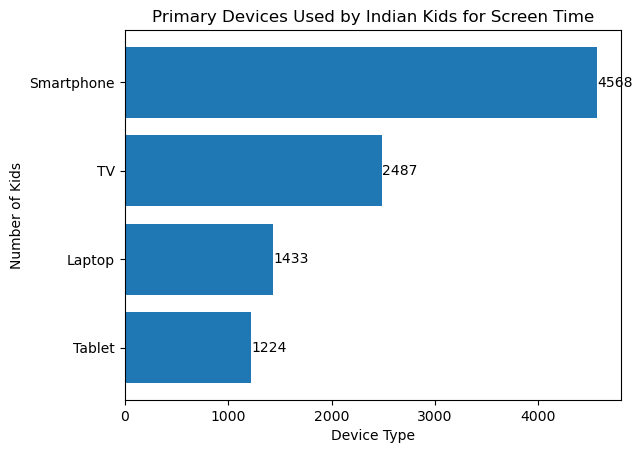

In [17]:
primary_device_df = df["primary_device"].value_counts(ascending=True)

plt.barh(primary_device_df.index, primary_device_df.values)
plt.xlabel("Device Type")
plt.ylabel("Number of Kids")
plt.bar_label(plt.gca().containers[0])
plt.title("Primary Devices Used by Indian Kids for Screen Time")
plt.show()

## Kids exceeding recommended limit

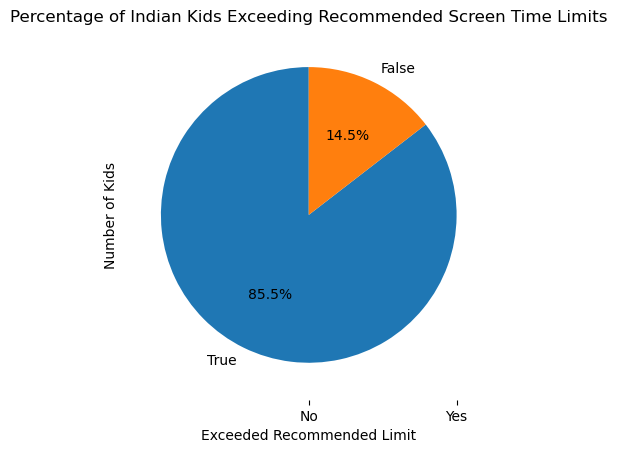

In [18]:
df["exceeded_recommended_limit"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Number of Kids")
plt.title("Percentage of Indian Kids Exceeding Recommended Screen Time Limits")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

In [19]:
urban_vs_rural_recommended_limit = df.groupby("urban_or_rural")["exceeded_recommended_limit"].value_counts(normalize=True).unstack()
urban_vs_rural_recommended_limit 

exceeded_recommended_limit,False,True
urban_or_rural,,
Rural,0.146452,0.853548
Urban,0.144796,0.855204


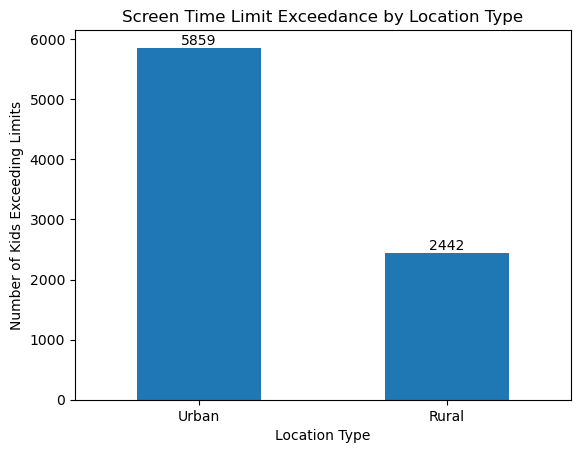

In [20]:
df.groupby(["urban_or_rural"])["exceeded_recommended_limit"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Location Type")
plt.ylabel("Number of Kids Exceeding Limits")
plt.xticks(rotation=0)
plt.title("Screen Time Limit Exceedance by Location Type")
plt.bar_label(plt.gca().containers[0])
plt.show()

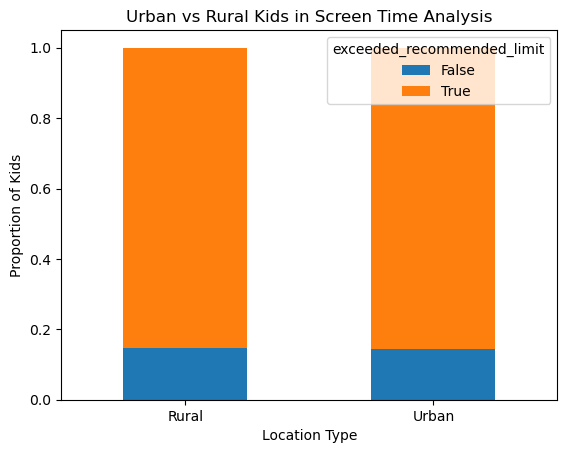

In [21]:
urban_vs_rural_recommended_limit.plot(kind="bar", stacked=True)
plt.xlabel("Location Type")
plt.ylabel("Proportion of Kids")
plt.xticks(rotation=0)
plt.title("Urban vs Rural Kids in Screen Time Analysis")
plt.show()

## Urban vs Rural avg screen time

In [22]:
genders = df["gender"].drop_duplicates().values
urban_or_rural_categories = df["urban_or_rural"].drop_duplicates().values

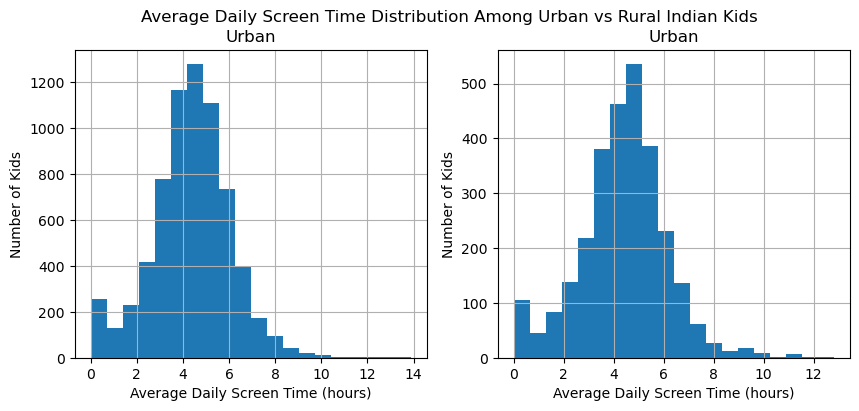

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, cat in enumerate(urban_or_rural_categories):
    axes[i].hist(df[df["urban_or_rural"] == cat]["avg_daily_screen_time_hr"], bins=20)
    axes[i].set_xlabel("Average Daily Screen Time (hours)")
    axes[i].set_ylabel("Number of Kids")
    axes[i].set_title("Urban")
    axes[i].grid()

plt.suptitle("Average Daily Screen Time Distribution Among Urban vs Rural Indian Kids")
plt.show()

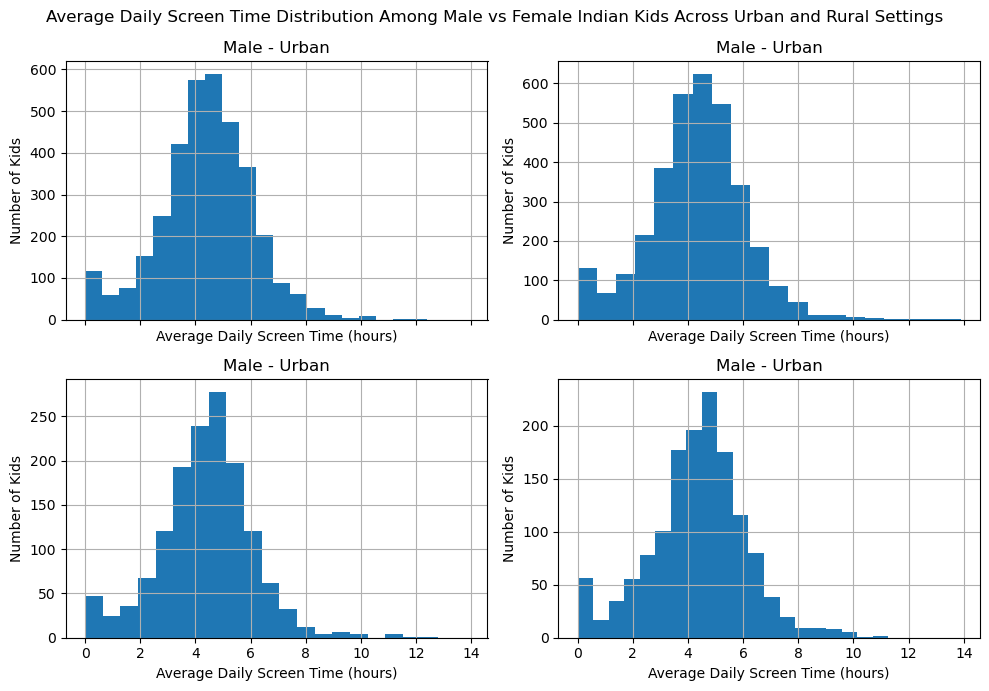

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True)

for i, cat in enumerate(urban_or_rural_categories):
    for j, gender in enumerate(genders):
        axes[i, j].hist(df[(df["urban_or_rural"] == cat) & (df["gender"] == gender)]["avg_daily_screen_time_hr"], bins=20)
        axes[i, j].set_xlabel("Average Daily Screen Time (hours)")
        axes[i, j].set_ylabel("Number of Kids")
        axes[i, j].set_title("Male - Urban")
        axes[i, j].grid()

plt.suptitle("Average Daily Screen Time Distribution Among Male vs Female Indian Kids Across Urban and Rural Settings")
plt.tight_layout()
plt.show()

## Screen time of children having health impact and not having health impact

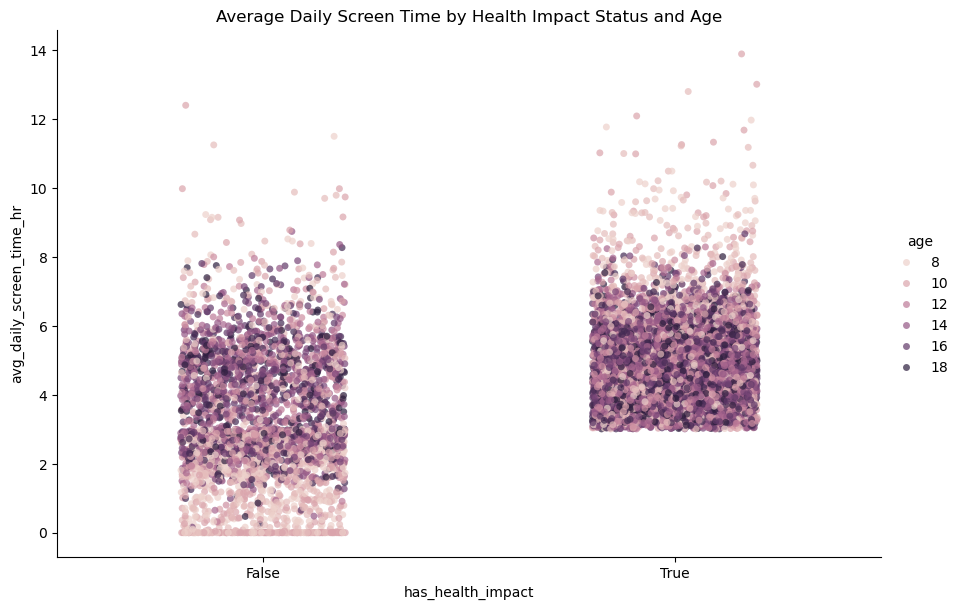

In [25]:
sns.catplot(kind="strip", data=df, y="avg_daily_screen_time_hr", x="has_health_impact", hue="age", jitter=0.2, alpha=0.7, height=6, aspect=1.5)
plt.title("Average Daily Screen Time by Health Impact Status and Age")
plt.show()

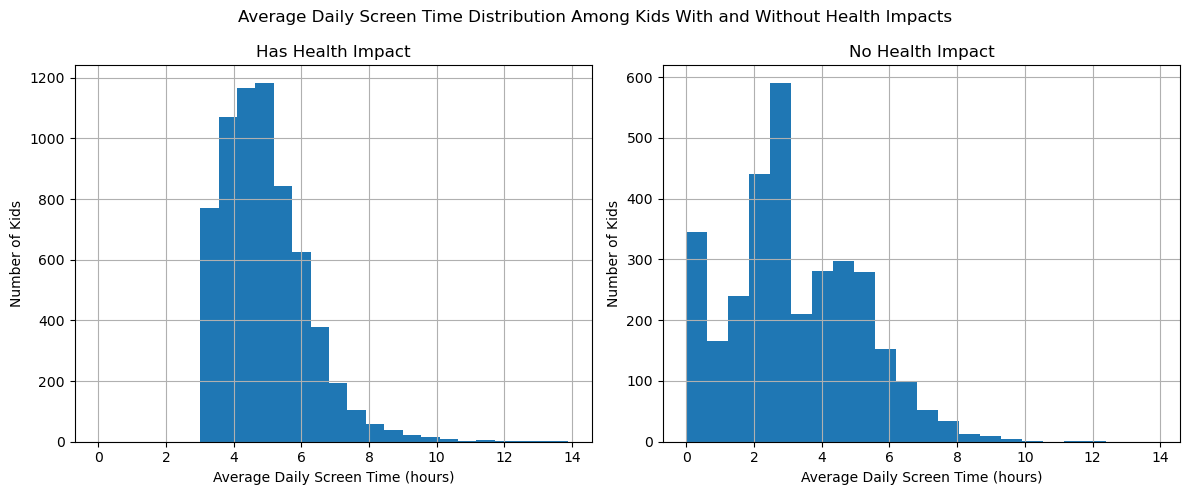

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)
axes = axes.flatten()

axes[0].hist(df[df["has_health_impact"]]["avg_daily_screen_time_hr"], bins=20)
axes[0].set_xlabel("Average Daily Screen Time (hours)")
axes[0].set_ylabel("Number of Kids")
axes[0].set_title("Has Health Impact")
axes[0].grid()

axes[1].hist(df[~df["has_health_impact"]]["avg_daily_screen_time_hr"], bins=20)
axes[1].set_xlabel("Average Daily Screen Time (hours)")
axes[1].set_ylabel("Number of Kids")
axes[1].set_title("No Health Impact")
axes[1].grid()

plt.suptitle("Average Daily Screen Time Distribution Among Kids With and Without Health Impacts")
plt.tight_layout()
plt.show()

## Educational to Recreational Screen Time Ratio

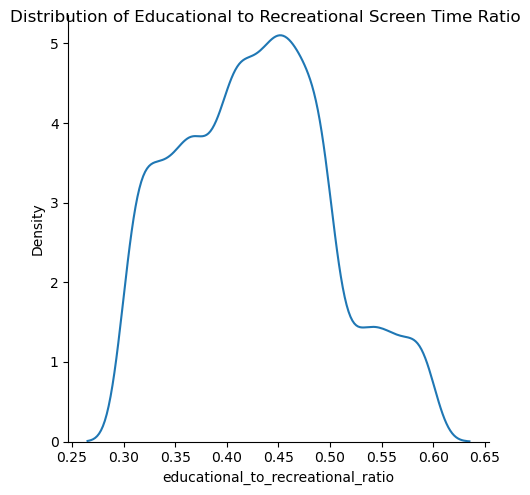

In [27]:
sns.displot(data=df, x="educational_to_recreational_ratio", kind="kde")
plt.suptitle("Distribution of Educational to Recreational Screen Time Ratio")
plt.show()

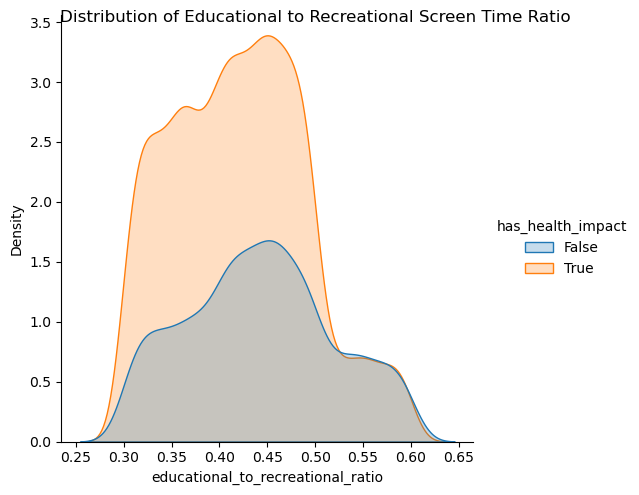

In [28]:
sns.displot(data=df, x="educational_to_recreational_ratio", kind="kde", hue="has_health_impact", fill=True)
plt.suptitle("Distribution of Educational to Recreational Screen Time Ratio")
plt.show()

### Educational to Recreational Screen Time Ratio by Device Type

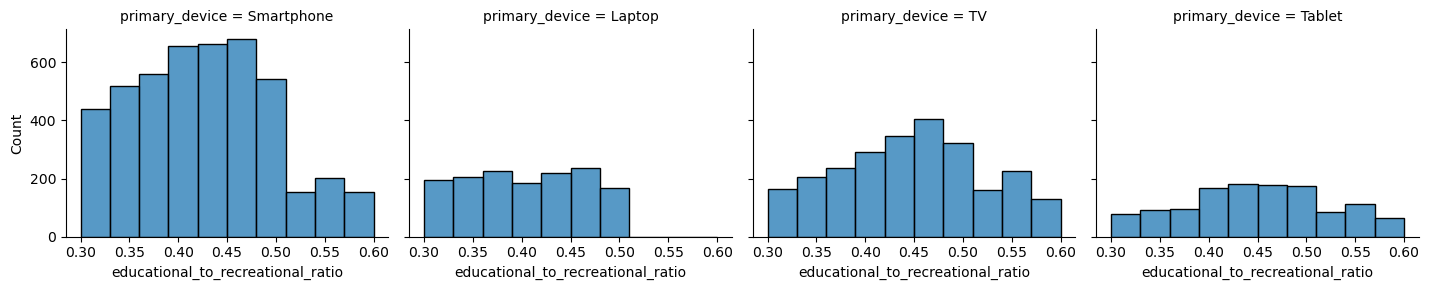

In [29]:
sns.displot(data=df, x="educational_to_recreational_ratio", kind="hist", col="primary_device", height=3, aspect=1.2, bins=10)
plt.show()

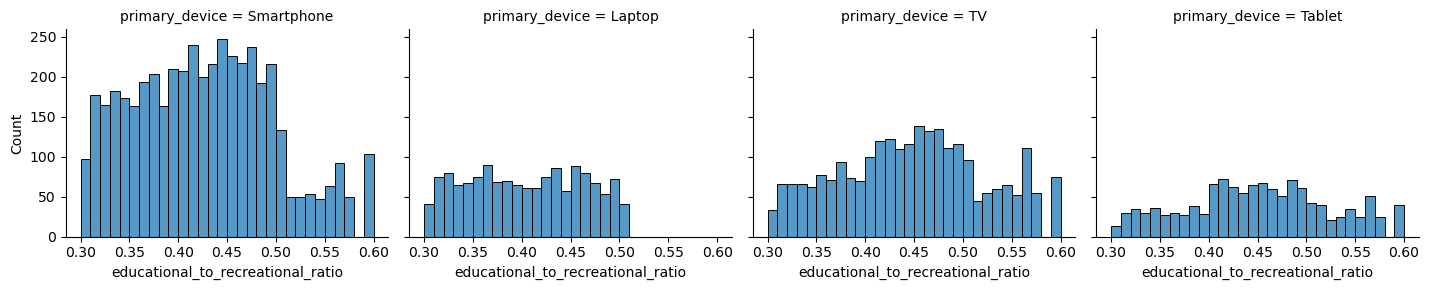

In [30]:
sns.displot(data=df, x="educational_to_recreational_ratio", kind="hist", col="primary_device", height=3, aspect=1.2)
plt.show()

### Educational to Recreational by age group

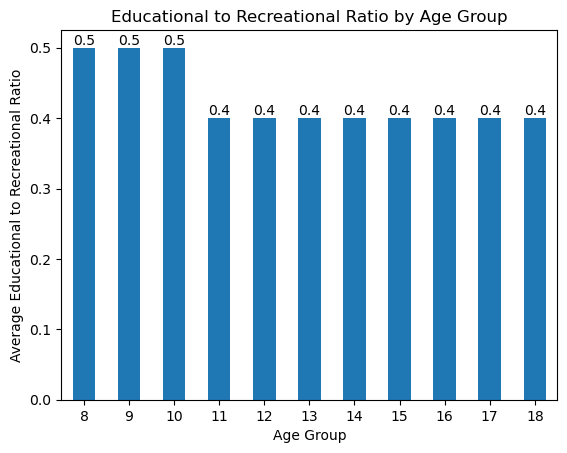

In [31]:
df.groupby("age")["educational_to_recreational_ratio"].mean().round(1).plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Average Educational to Recreational Ratio")
plt.title("Educational to Recreational Ratio by Age Group")
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

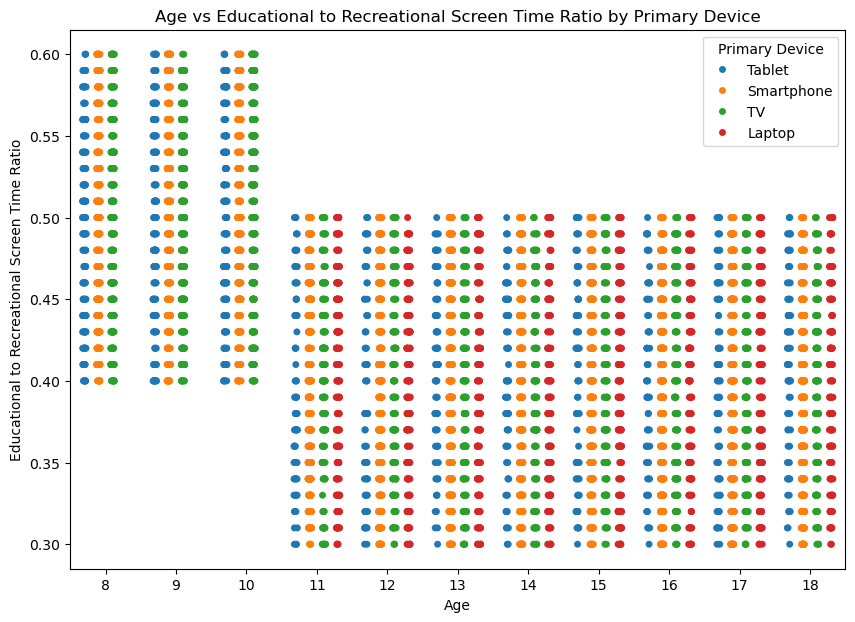

In [32]:
plt.figure(figsize=(10, 7))
sns.stripplot(data=df, x="age", y="educational_to_recreational_ratio", hue="primary_device", dodge=True)
plt.xlabel("Age")
plt.ylabel("Educational to Recreational Screen Time Ratio")
plt.title("Age vs Educational to Recreational Screen Time Ratio by Primary Device")
plt.legend(title="Primary Device")
plt.show()

### Average Educational to Recreational Ratio by Device

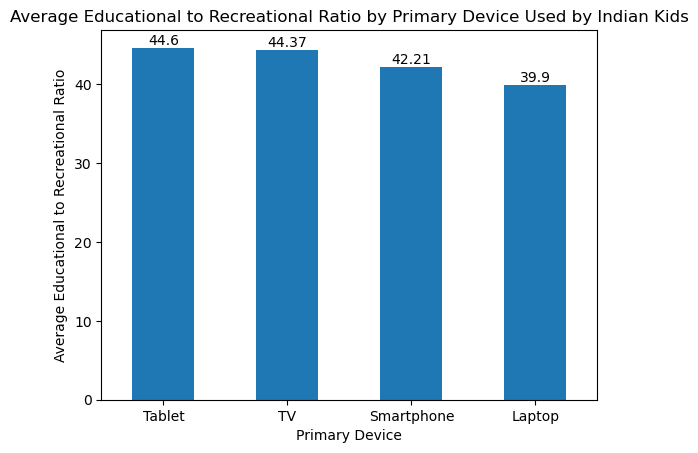

In [33]:
avg_ratio_by_device = (df.groupby("primary_device")["educational_to_recreational_ratio"].mean() * 100).round(2).sort_values(ascending=False)

avg_ratio_by_device.plot(kind="bar", xlabel="Primary Device", ylabel="Average Educational to Recreational Ratio", title="Average Educational to Recreational Ratio by Primary Device Used by Indian Kids")
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

## Primary devices

### Device usage

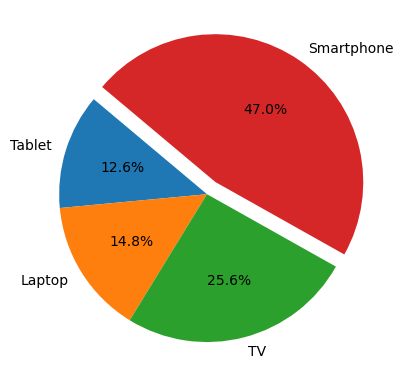

In [34]:
plt.pie(primary_device_df.values, labels=primary_device_df.index, autopct="%1.1f%%", startangle=140, explode=[0.1 if device == "Smartphone" else 0 for device in primary_device_df.index])
plt.show()

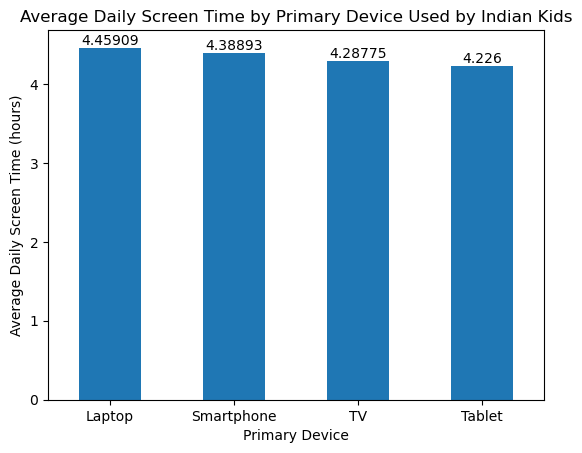

In [35]:
df.groupby("primary_device")["avg_daily_screen_time_hr"].mean().plot(kind="bar", xlabel="Primary Device", ylabel="Average Daily Screen Time (hours)", title="Average Daily Screen Time by Primary Device Used by Indian Kids")
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

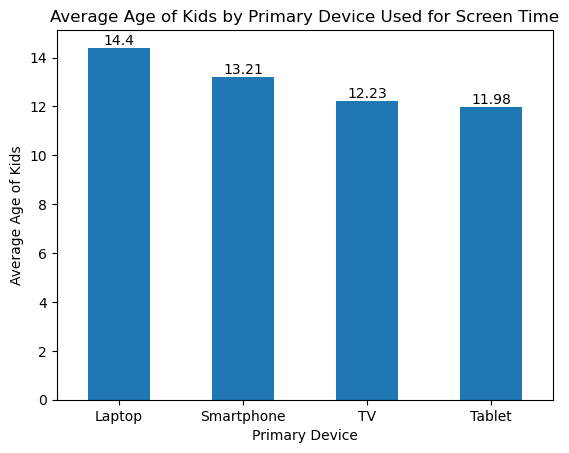

In [36]:
df.groupby("primary_device")["age"].mean().round(2).sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Primary Device")
plt.ylabel("Average Age of Kids")
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.title("Average Age of Kids by Primary Device Used for Screen Time")
plt.show()

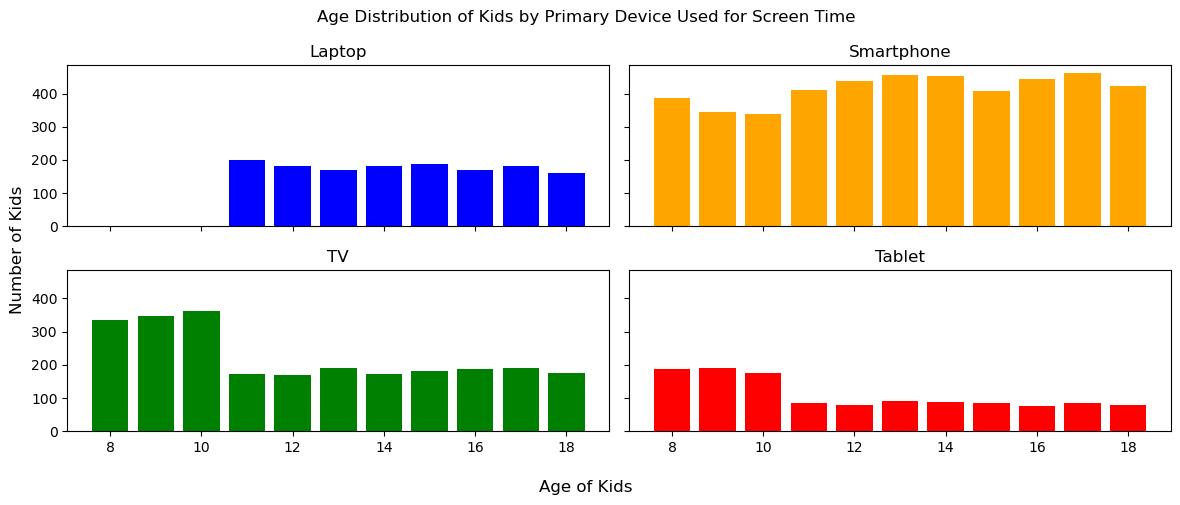

In [37]:
age_device_df = df[["age", "primary_device"]].value_counts().sort_index().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 5))
axes = axes.flatten()

device_colors = ["blue", "orange", "green", "red"]

for i, device in enumerate(age_device_df.columns):
    axes[i].bar(age_device_df.index, age_device_df[device], color=device_colors[i])
    axes[i].set_title(device)

fig.supxlabel("Age of Kids")
fig.supylabel("Number of Kids")
fig.suptitle("Age Distribution of Kids by Primary Device Used for Screen Time")

plt.tight_layout()
plt.show()

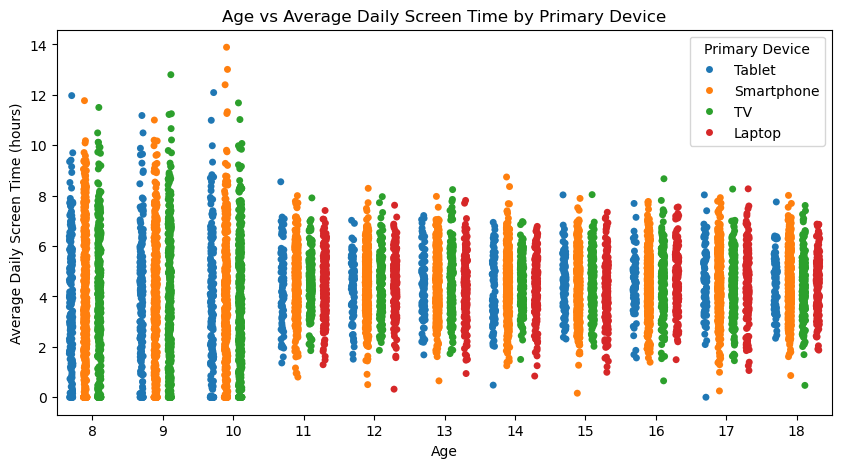

In [38]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x="age", y="avg_daily_screen_time_hr", hue="primary_device", dodge=True)
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")
plt.title("Age vs Average Daily Screen Time by Primary Device")
plt.legend(title="Primary Device")
plt.show()

## Health problems by device type

In [39]:
health_problem_by_device = df.groupby("primary_device")[["poor_sleep", "eye_strain", "obesity_risk", "anxiety"]].agg(["sum", "count"])
health_problem_by_device

poor_sleep       eye_strain       obesity_risk       anxiety  \
                      sum count        sum count          sum count     sum   
primary_device                                                                
Laptop                791  1433        396  1433          175  1433     280   
Smartphone           2306  4568       1173  4568          612  4568     743   
TV                   1180  2487        546  2487          287  2487     389   
Tablet                591  1224        267  1224          143  1224     193   

                      
               count  
primary_device        
Laptop          1433  
Smartphone      4568  
TV              2487  
Tablet          1224

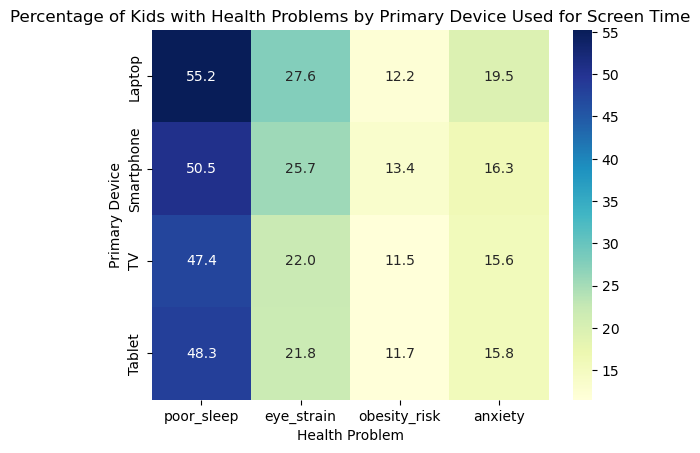

In [40]:
pct_health = health_problem_by_device.xs("sum", level=1, axis=1) / health_problem_by_device.xs("count", level=1, axis=1) * 100

sns.heatmap(pct_health, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of Kids with Health Problems by Primary Device Used for Screen Time")
plt.xlabel("Health Problem")
plt.ylabel("Primary Device")
plt.show()

## Health problem by age group

In [41]:
health_problem_by_age = df.groupby("age")[["poor_sleep", "eye_strain", "obesity_risk", "anxiety"]].agg(["sum", "count"])
health_problem_by_age

poor_sleep       eye_strain       obesity_risk       anxiety      
           sum count        sum count          sum count     sum count
age                                                                   
8          349   912        149   912           82   912      98   912
9          336   885        151   885           98   885      97   885
10         329   877        149   877           71   877     109   877
11         467   866        247   866          114   866     141   866
12         484   867        248   867          138   867     157   867
13         499   910        241   910          132   910     164   910
14         499   896        235   896          130   896     174   896
15         460   864        233   864          114   864     165   864
16         484   876        237   876          109   876     174   876
17         513   919        251   919          118   919     159   919
18         448   840        241   840          111   840     167   840

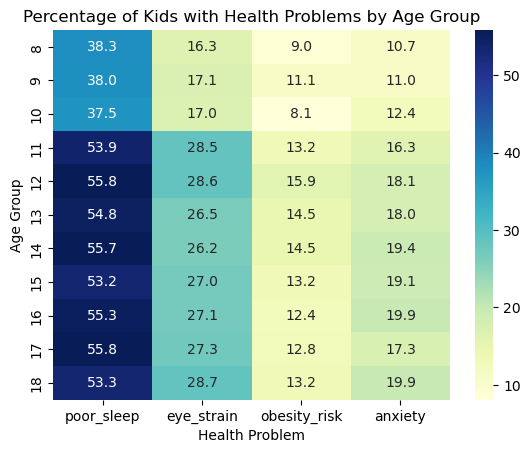

In [42]:
pct_health_by_age = health_problem_by_age.xs("sum", level=1, axis=1) / health_problem_by_age.xs("count", level=1, axis=1) * 100

sns.heatmap(pct_health_by_age, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of Kids with Health Problems by Age Group")
plt.xlabel("Health Problem")
plt.ylabel("Age Group")
plt.show()

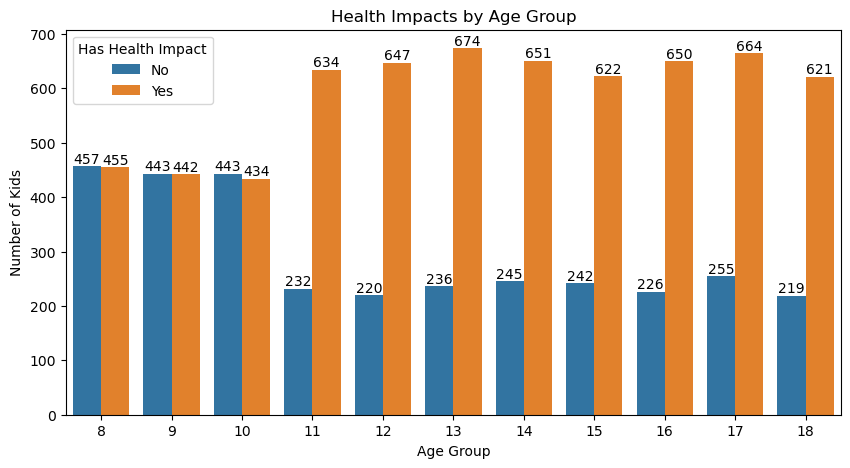

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="age", hue="has_health_impact")

for container in ax.containers:
    ax.bar_label(container, fmt="%d")

plt.xlabel("Age Group")
plt.ylabel("Number of Kids")
plt.title("Health Impacts by Age Group")
plt.legend(title="Has Health Impact", labels=["No", "Yes"])
plt.show()

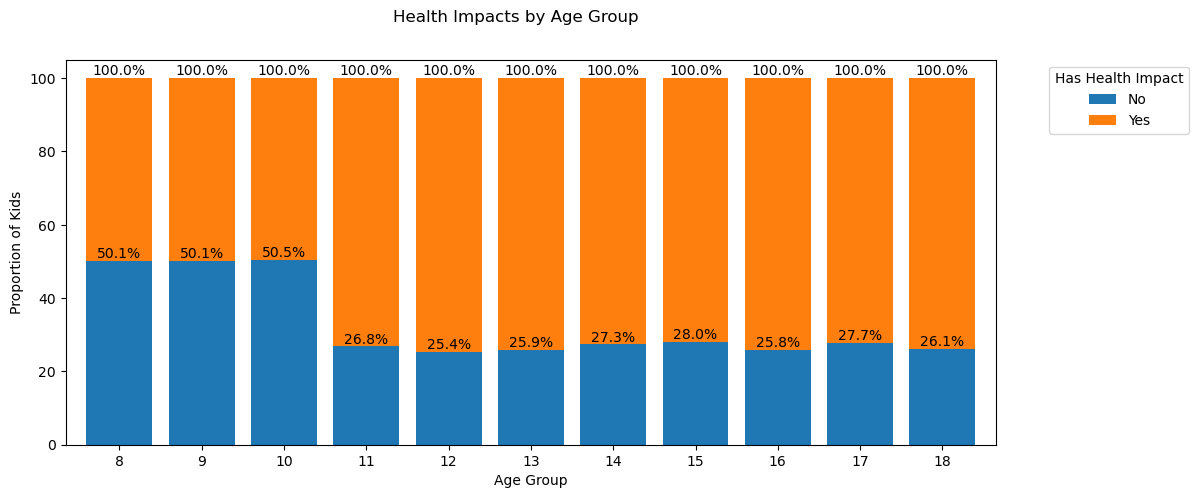

In [44]:
health_impact_by_age = df.groupby("age")["has_health_impact"].value_counts(normalize=True)
health_impact_by_age = health_impact_by_age * 100

ax = health_impact_by_age.unstack(fill_value=0).plot(kind="bar", stacked=True, width=0.8, figsize=(12, 5))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%")

ax.set_xlabel("Age Group")
ax.set_ylabel("Proportion of Kids")
plt.xticks(rotation=0)
plt.suptitle("Health Impacts by Age Group")
plt.legend(title="Has Health Impact", labels=["No", "Yes"], loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

## Avg Screen time vs Avg Educational to Recreational Ratio

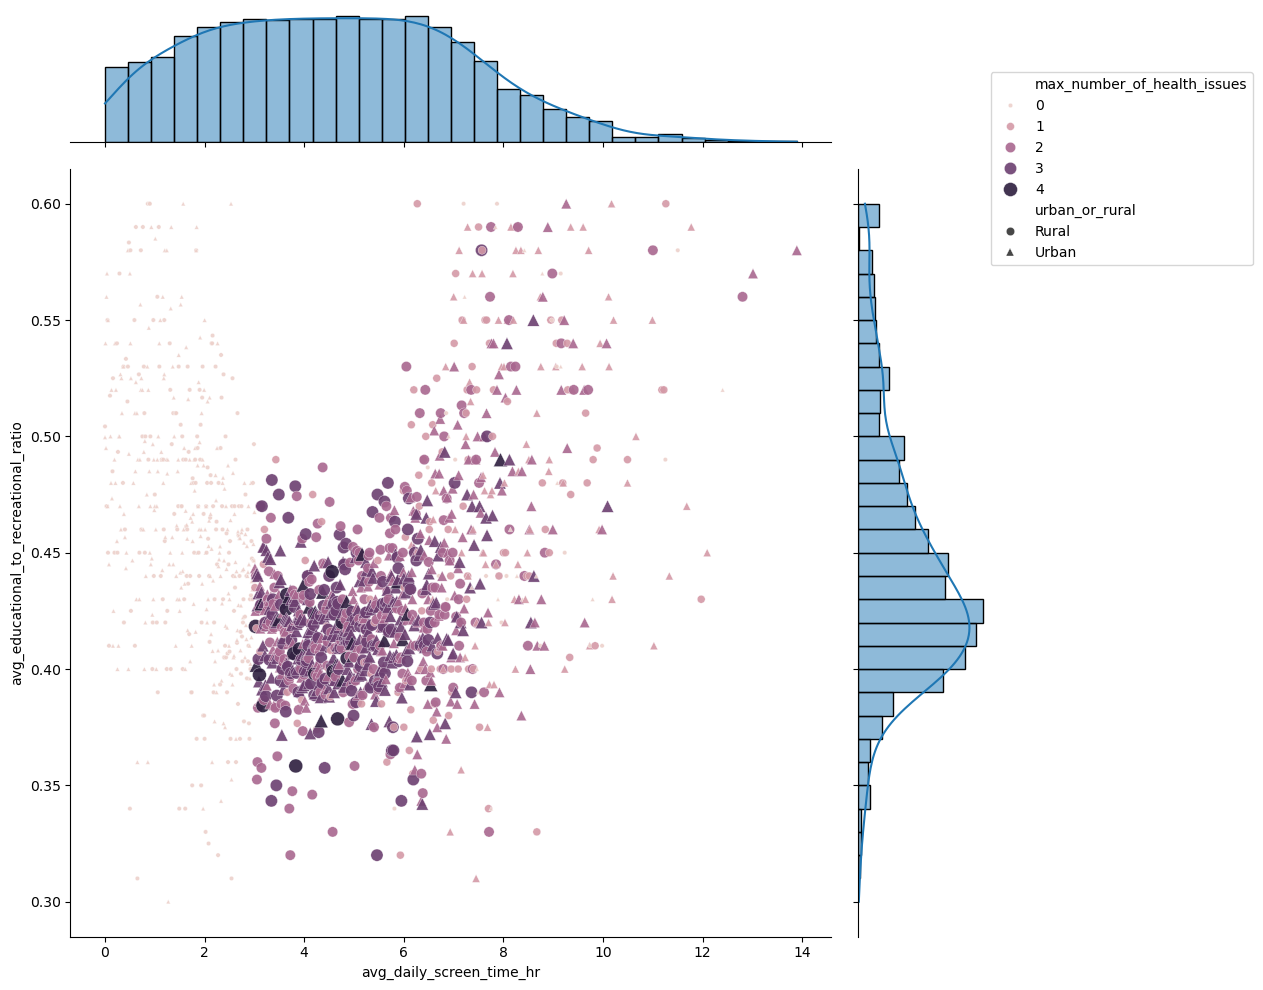

In [45]:
edu_to_rec_ratio_by_screen_time = df.groupby(["avg_daily_screen_time_hr", "urban_or_rural"]).agg(
    avg_educational_to_recreational_ratio=("educational_to_recreational_ratio", "mean"),
    no_of_kids_with_health_impact=("health_impact_count", "sum"),
    max_number_of_health_issues=("total_number_of_health_impacts", "max")
).reset_index()

g = sns.jointplot(data=edu_to_rec_ratio_by_screen_time, x="avg_daily_screen_time_hr", y="avg_educational_to_recreational_ratio", kind="reg", height=10, marginal_kws={"bins": 30})

g.ax_joint.cla()

sns.scatterplot(
    data=edu_to_rec_ratio_by_screen_time,
	x="avg_daily_screen_time_hr",
	y="avg_educational_to_recreational_ratio",
	hue="max_number_of_health_issues",
    size="max_number_of_health_issues",
	sizes=(10, 100),
    alpha=0.9,
	ax=g.ax_joint,
    style="urban_or_rural",
    markers=["o", "^"]
)

sns.move_legend(g.ax_joint, "center left", bbox_to_anchor=(1.2, 1))
plt.show()